In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from dotenv import load_dotenv
import os

load_dotenv()
PROJECT_DIR = os.getenv("PROJECT_DIR")

In [2]:
df = pd.read_csv(f"{PROJECT_DIR}/eda-and-visualization/IT-salary/data/processed/initial_cleaned_IT_survey(v.0.2).csv",
                parse_dates=["timestamp"])

## Exploratory Data Analysis

#### Dataset Lookup

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             2076 non-null   datetime64[ns]
 1   age                   2076 non-null   int64         
 2   gender                2076 non-null   object        
 3   city                  2076 non-null   object        
 4   seniority_level       2076 non-null   object        
 5   position              2076 non-null   object        
 6   experience            2076 non-null   int64         
 7   programming_language  2076 non-null   object        
 8   salary                2076 non-null   float64       
 9   salary_one_year_ago   2076 non-null   float64       
 10  vacation_days         2076 non-null   object        
 11  language              2076 non-null   object        
 12  company_size          2076 non-null   object        
 13  company_type      

In [4]:
df.sample(5)

,timestamp,age,gender,city,seniority_level,position,experience,programming_language,salary,salary_one_year_ago,vacation_days,language,company_size,company_type,contract_duration,survey_year
815,2019-12-19 20:59:23,30,F,Amsterdam,Senior,Manager,8,HR,65000.0,0.0,25.0,English,1000+,Bodyshop / Outsource,unlimited,2019
1160,2020-11-24 14:29:49,36,M,Nürnberg,Junior,Frontend Developer,1,Javascript,37500.0,0.0,28,German,upto-10,Startup,temporary,2020
1649,2020-11-26 20:41:46,33,M,Berlin,Senior,Backend Developer,13,Java,110000.0,0.0,24,English,100-1000,Product,unlimited,2020
433,2019-12-04 18:30:51,31,M,Berlin,Senior,Data Engineer,6,Python,75000.0,60000.0,28.0,English,100-1000,Product,unlimited,2019
405,2019-12-04 14:58:30,26,M,Berlin,Middle,Machine Learning Engineer,3,Python,46000.0,46000.0,24.0,English,10-50,Product,1Y+,2019


- Summary statistics of Numerical Variables

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,2076,2020-06-25 08:29:54.777938688,2019-12-02 11:18:26,2019-12-05 12:50:34.500000,2020-11-24 12:01:30,2020-11-25 19:55:20,2021-01-19 12:01:11,NaN
age,2076.0,32.482177,22.0,29.0,32.0,35.0,69.0,5.284683
experience,2076.0,8.569364,0.0,5.0,8.0,11.0,40.0,5.061407
salary,2076.0,69153.306421,30000.0,60000.0,68375.0,80000.0,110000.0,15787.792315
salary_one_year_ago,2076.0,43459.22158,0.0,0.0,55000.0,70000.0,760000.0,36413.957327
survey_year,2076.0,2019.560212,2019.0,2019.0,2020.0,2020.0,2020.0,0.496481


- Summary statistics of Catagorical Variables

In [6]:
df.describe(include="object").T

,count,unique,top,freq
gender,2076,2,M,1748
city,2076,132,Berlin,1057
seniority_level,2076,14,Senior,1087
position,2076,161,Backend Developer,400
programming_language,2076,261,Java,342
vacation_days,2076,61,30,575
language,2076,15,English,1664
company_size,2076,6,100-1000,730
company_type,2076,52,Product,1344
contract_duration,2076,6,unlimited,1934


#### Queries
- Male or Female who make more salary
- which programming language is used to generate high income
- Average salary of a emoployee who work in product based company


In [7]:
df.head()

,timestamp,age,gender,city,seniority_level,position,experience,programming_language,salary,salary_one_year_ago,vacation_days,language,company_size,company_type,contract_duration,survey_year
0,2019-12-02 11:18:26,33,M,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,58000.0,29.0,English,50-100,Startup,unlimited,2019
1,2019-12-02 11:18:35,29,M,Berlin,Middle,Backend Developer,3,Python,55000.0,55000.0,22.0,English,10-50,Product,unlimited,2019
2,2019-12-02 11:18:56,32,M,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,55000.0,27.0,English,1000+,Startup,unlimited,2019
3,2019-12-02 11:19:08,30,M,Berlin,Senior,Backend Developer,6,PHP,63000.0,0.0,24.0,English,100-1000,Product,unlimited,2019
4,2019-12-02 11:19:37,32,M,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,56000.0,30.0,English,50-100,Product,unlimited,2019


- Salary distribution

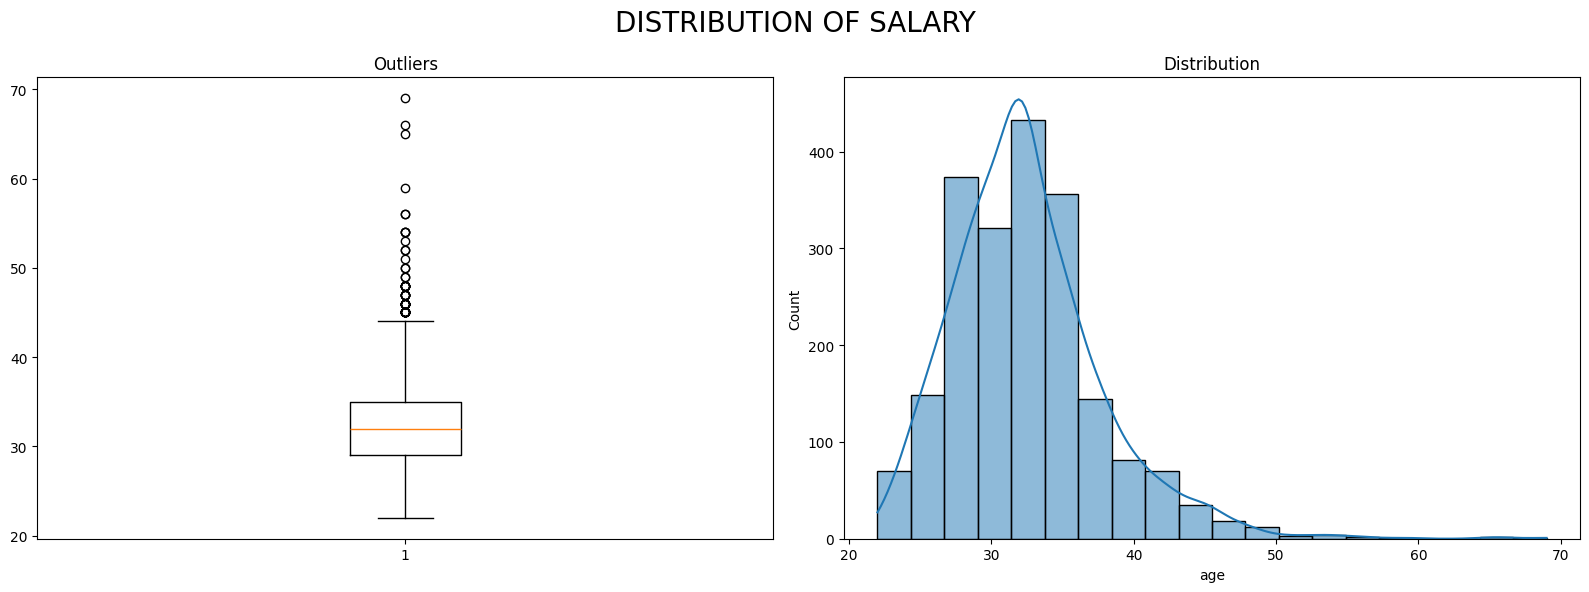

In [8]:
fig, ax = plt.subplot_mosaic("""AB""", figsize=(16,6))
fig.suptitle("DISTRIBUTION OF SALARY", fontsize=20)

ax['A'].boxplot(df['age'])
ax['A'].set_title("Outliers")

sns.histplot(df['age'], ax=ax['B'], kde=True, bins=20)
ax['B'].set_title("Distribution")

plt.tight_layout()
plt.show()

    Salary variable in Right Skewed Distribution

In [9]:
numerical_columns = df.select_dtypes(include=np.number).columns
catagorical_columns = df.select_dtypes(include="object").columns

- Numerical Variables

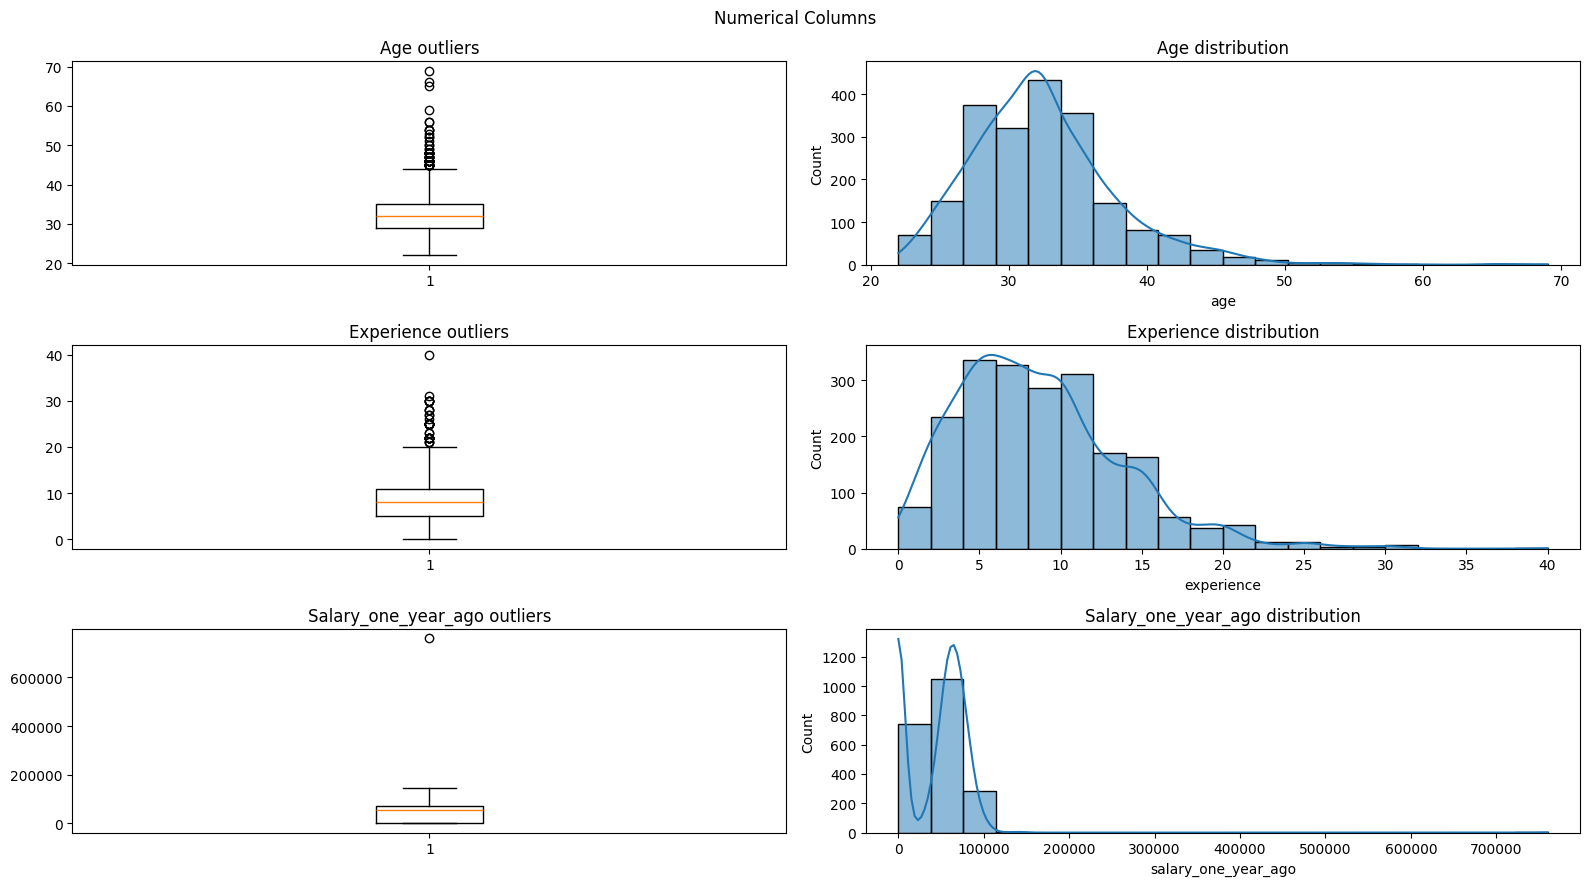

In [10]:
plt.figure(figsize=(16,9))
cols = ['age' , 'experience', 'salary_one_year_ago']
for index, each in enumerate(cols):
    plt.suptitle("Numerical Columns")
    plt.subplot(3,2, index*2+1)
    plt.title(f"{each.capitalize()} outliers")
    plt.boxplot(df[each])
    
    plt.subplot(3,2, index*2+2)
    plt.title(f"{each.capitalize()} distribution")
    sns.histplot(df[each], kde=True, bins=20)
plt.tight_layout()
plt.show()

- Catagorical Variable

In [11]:
for each in catagorical_columns:
    print(each)
    print(df[each].unique())
    print("-" * 20)

gender
['M' 'F']
--------------------
city
['Berlin' 'Hamburg' 'Munich' 'Frankfurt' 'Cologne' 'Düsseldorf'
 'Wolfsburg' 'MA' 'Leipzig' 'Nuremberg' 'Krakow' 'Prague' 'Wroclaw'
 'Stuttgart' 'London' 'Karlsruhe' 'Ingolstadt' 'Moscow' 'Darmstadt'
 'Dusseldorf' 'Kyiv' 'Freiburg' 'Amsterdam' 'Vienna' 'Pforzheim' 'Kassel '
 'Madrid' 'Hannover' 'Paris' 'Odesa' 'Cork' 'Brussels' 'Bielefeld'
 'Dublin' 'Jyvaskyla' 'Toulouse' 'Zurich' 'Lingen' 'Warsaw' 'Dresden'
 'Lugano' 'Walldorf' 'Schleswig-Holstein' 'Braunschweig' 'Kaiserslautern'
 'Eindhoven' 'Saint Petersburg' 'Eindhoven ' 'Leeuwarden' 'Hilversum'
 'Gothenburg' 'Almere' 'Limassol' 'Stockholm' 'Tampere' 'Bayern'
 'Rotterdam' 'Antwerpen' 'Tallinn' 'Koblenz' 'Würzburg ' 'Bremen'
 'Lausanne' 'Heidelberg' 'Minsk' 'Utrecht' 'Kiev' 'Konstanz area'
 'Kempten' 'Münster' 'Erlangen' 'Rosenheim' 'Mannheim ' 'Boeblingen'
 'Nürnberg' 'Ansbach' 'Mannheim' 'Tuttlingen' 'Bonn' 'Köln' 'Karlsruhe '
 'Helsinki' 'Würzburg' 'Den Haag' 'Braunschweig ' 'Stuttgart '

- WordCloud of Relevent Catagorical Varibales

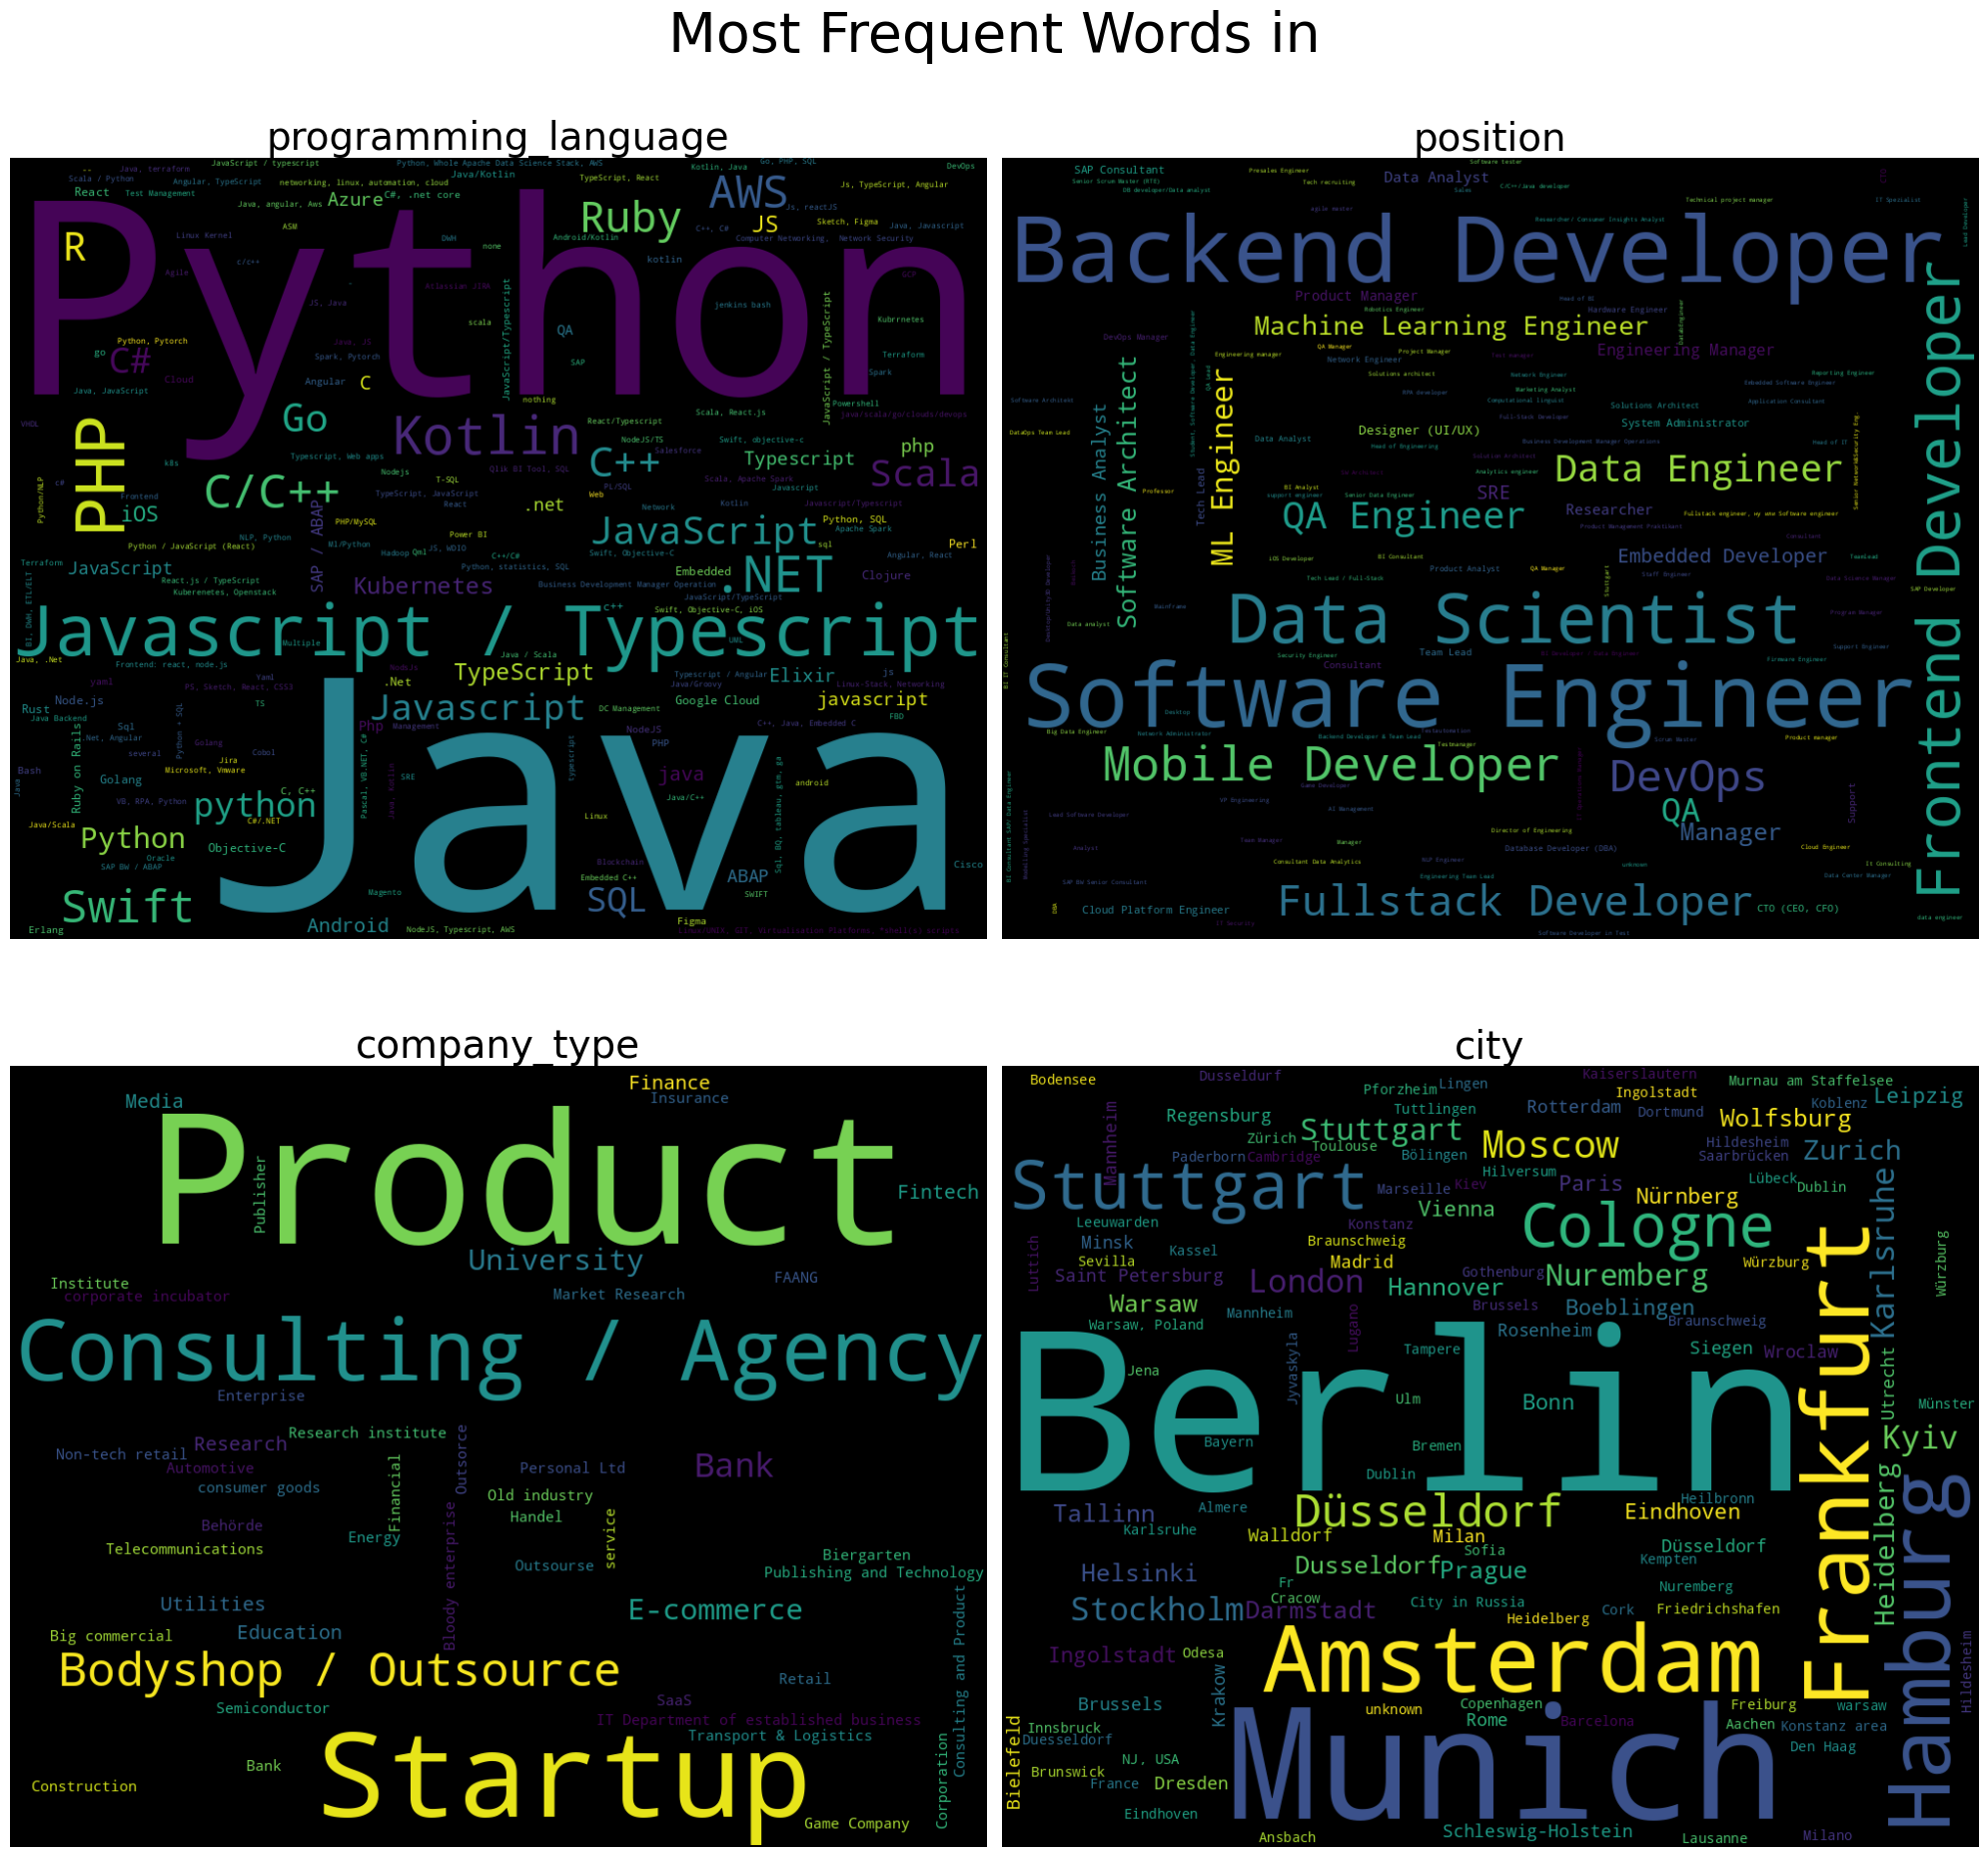

In [54]:
cols = ["programming_language", "position", "company_type", "city"]
temp_df = df[(df['programming_language'] != "Not Provided") & (df['programming_language'] != "Not Relevant")] 

plt.figure(figsize=(20,20))
for index, each in enumerate(cols, start=1):
    plt.suptitle("Most Frequent Words in", fontsize=40)
    plt.subplot(2,2, index)
    items_cloud = WordCloud(width=1000, height=800).generate_from_frequencies(temp_df[each].value_counts())
    plt.title(each, fontsize=28)
    plt.imshow(items_cloud, interpolation="bilinear")
    plt.axis("off")
plt.tight_layout()
plt.show()

- Lowest Paying Job and Highest Paying Job

In [14]:
hj = df.groupby("survey_year")['salary'].idxmax()
lj = df.groupby("survey_year")['salary'].idxmin()

highest_job = df.loc[hj, ["position", "survey_year", "salary", "experience"]]
lowest_job = df.loc[lj, ["position", "survey_year", "salary", "experience"]]

In [62]:
lowest_job

,position,survey_year,salary,experience
466,Fullstack Developer,2019,30000.0,1
1331,Software Engineer,2020,30000.0,3


In [16]:
highest_job

,position,survey_year,salary,experience
380,Backend Developer,2019,110000.0,7
977,Data Scientist,2020,110000.0,10


- Average Salary by Gender

<Axes: title={'center': 'Average Salary'}, xlabel='gender', ylabel='salary'>

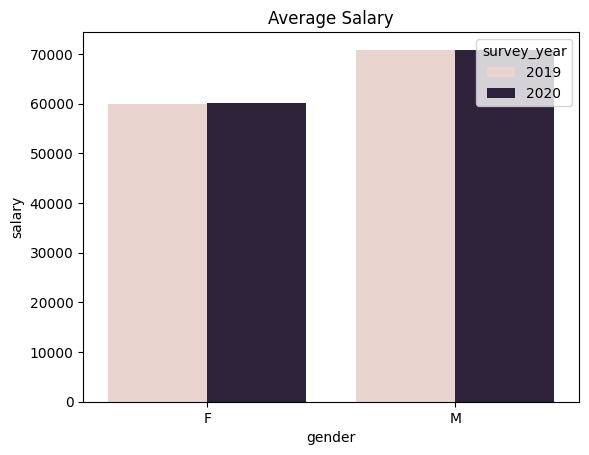

In [17]:
salay_by_gender = df.groupby(['gender', 'survey_year'], as_index=False)['salary'].mean()
plt.title("Average Salary")
sns.barplot(data=salay_by_gender, x='gender', y='salary', hue='survey_year')

- How salary change over diffrent cities

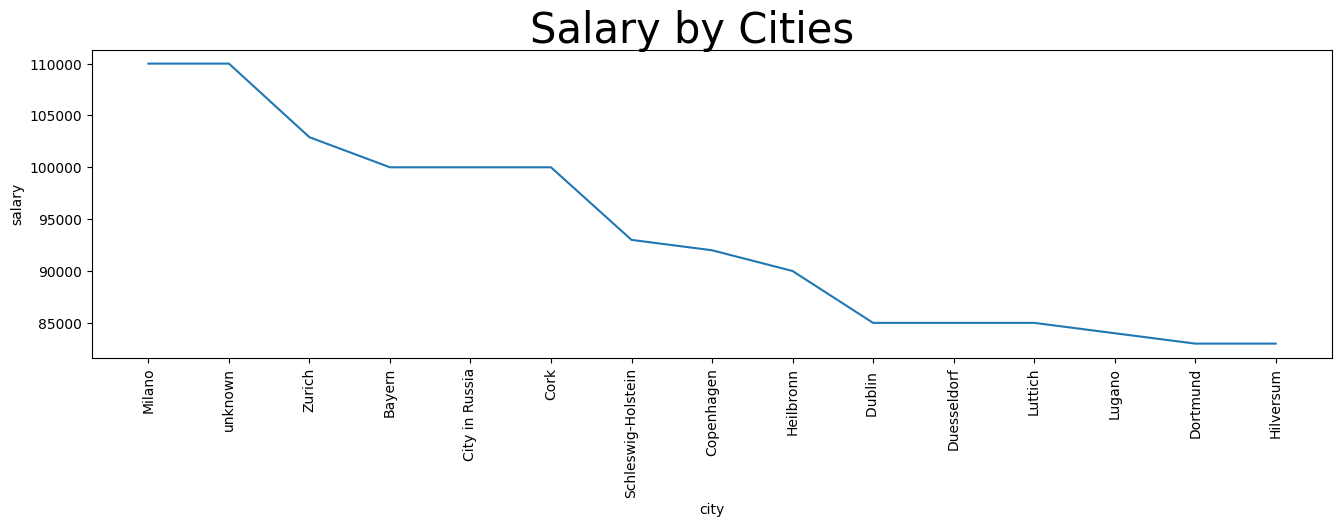

In [70]:
city_groupby = df.groupby('city', as_index=False)['salary'].mean().nlargest(columns='salary', n=15)
plt.figure(figsize=(16,4))
plt.suptitle("Salary by Cities", fontsize=30)
sns.lineplot(data=city_groupby, x='city', y='salary')
plt.xticks(rotation=90)
plt.show()

- Salary by Company type

In [78]:
comapny_type_salary = df.groupby('company_type', as_index=False)['salary'].mean().nlargest(n=10, columns="salary")
comapny_type_salary

,company_type,salary
34,Personal Ltd,110000.0
1,Automotive,108000.0
29,Multinational,90000.0
9,Construction,89200.0
16,Enterprise,85000.0
49,consumer goods,85000.0
23,IT Department of established business,84000.0
12,Corporation,80000.0
15,Energy,80000.0
31,Old industry,80000.0


In [21]:
realtion_vals = {"experience" : "salary", "age" : "salary"}

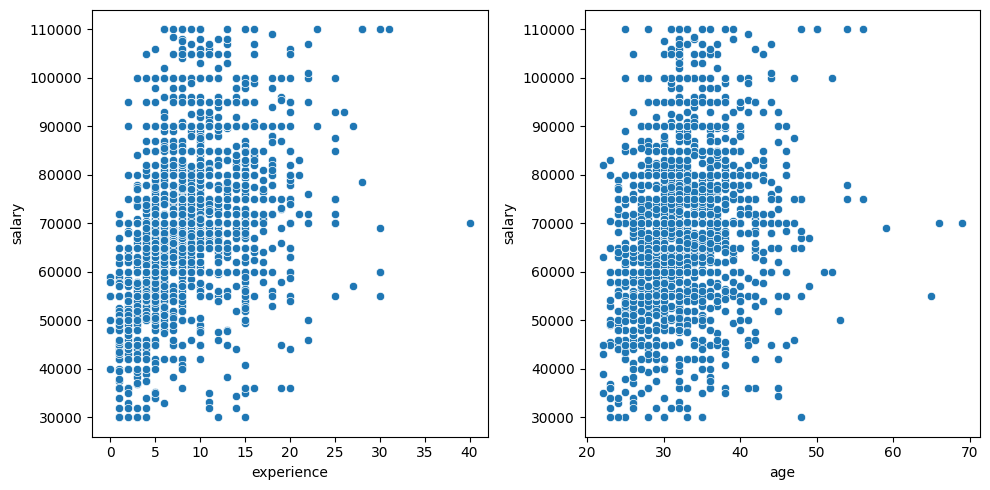

In [58]:
plt.figure(figsize=(10,5))
n = 1
for key, value in realtion_vals.items():
    plt.subplot(1,2, n)
    sns.scatterplot(data=df, x=key, y=value)
    n += 1

plt.tight_layout()
plt.show()

- Relationship during variables

In [ ]:
correlation_df = df[numerical_columns].corr()
sns.heatmap(correlation_df)